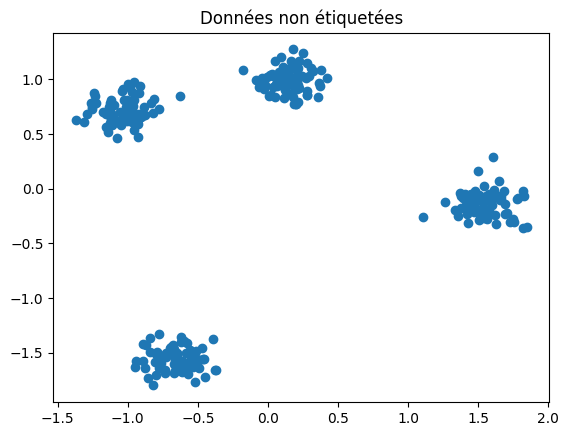

In [1]:
#imports & dataset commun 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

# 1) Générer un dataset artificiel (non supervisé)
X, _ = make_blobs(n_samples=300,
                  centers=4,
                  cluster_std=0.7,
                  random_state=42)

# 2) Optionnel : normaliser
X = StandardScaler().fit_transform(X)

# Visualisation brute des données
plt.scatter(X[:, 0], X[:, 1])
plt.title("Données non étiquetées")
plt.show()


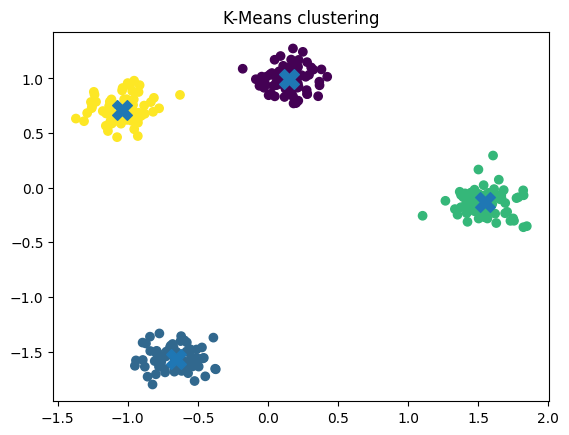

In [2]:

#Kmeans
from sklearn.cluster import KMeans

# On suppose qu'on cherche 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Apprentissage (non supervisé)
kmeans.fit(X)

# Labels prédits pour chaque point
labels_kmeans = kmeans.labels_

# Centres des clusters
centers = kmeans.cluster_centers_

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=labels_kmeans)
plt.scatter(centers[:, 0], centers[:, 1], marker='X', s=200)
plt.title("K-Means clustering")
plt.show()


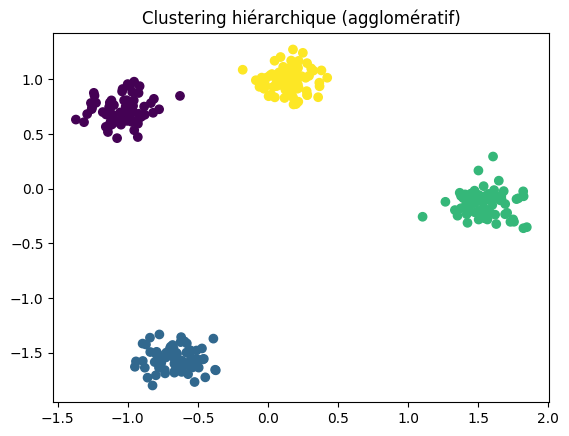

In [5]:

#Clustering Hiérarchique (Agglomératif)
from sklearn.cluster import AgglomerativeClustering

# On cherche aussi 4 clusters pour comparer
agglo = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Apprentissage + prédiction des labels
labels_agglo = agglo.fit_predict(X)

# Visualisation
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo)
plt.title("Clustering hiérarchique (agglomératif)")
plt.show()




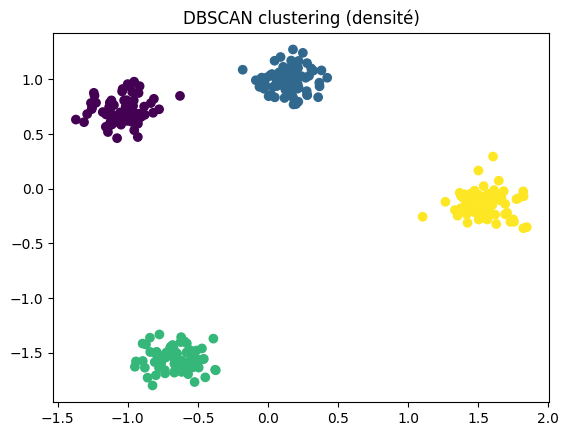

In [6]:
#DBSCAN (Clustering par densité)
from sklearn.cluster import DBSCAN

# eps : distance max, min_samples : nb minimum de points pour former un "core cluster"
dbscan = DBSCAN(eps=0.3, min_samples=5)

# Apprentissage + labels
labels_dbscan = dbscan.fit_predict(X)
# DBSCAN met le label -1 pour le "bruit" (outliers)
plt.scatter(X[:, 0], X[:, 1], c=labels_dbscan)
plt.title("DBSCAN clustering (densité)")
plt.show()


Variance expliquée par les 2 composantes : [0.52972817 0.47027183]


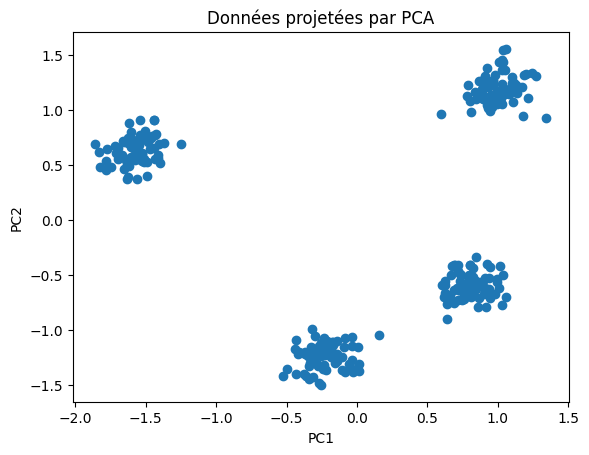

In [7]:

#PCA
#Ici on montre juste PCA sur les mêmes données (même si elles sont déjà en 2D, c’est pour l’exemple).
#Sur des données en dimension plus élevée, PCA sert à réduire à 2D/3D.
from sklearn.decomposition import PCA

# On réduit à 2 dimensions (utile si X a plus de colonnes)
pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)

print("Variance expliquée par les 2 composantes :", pca.explained_variance_ratio_)

# Visualisation
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.title("Données projetées par PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


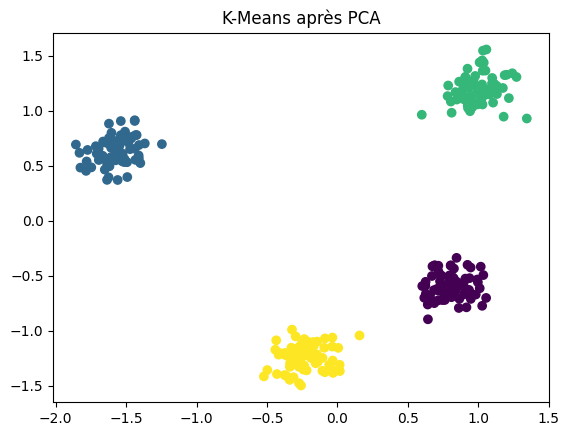

In [8]:

#combiner PCA + clustering
# PCA -> K-Means sur les données projetées
kmeans_pca = KMeans(n_clusters=4, random_state=42)
labels_kmeans_pca = kmeans_pca.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans_pca)
plt.title("K-Means après PCA")
plt.show()

